#### ARJUN KC (8773456)

### Fashion MNIST(fMNIST) dataset is also popular dataset for  image classification where it contains 70K gray images of fashion product which belongs to the 10 classes,where 60k images are used for training and 10k is used for testing.

### Loading all the necessary libraries for tensorflow

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import sklearn
from sklearn.metrics import confusion_matrix

### Loading the dataset

In [45]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

#### Data Exploration of Fashion MNIST(fMNIST)

In [46]:
print(f'Images DType: {type(train_images)}')  #print Numpy array containing images and its type
print(f'Image Element DType: {type(train_images[0,0,0])}') #defines that element in the numpy array which contain images has unit8 which means Unsigned 8-bit integer and value ranging from 0 to 255
print(f'Label Element DType: {type(train_labels[0])}')  #defines that label element in the numpy array which contain images has unit8 which means Unsigned 8-bit integer and value ranging from 0 to 255
print("................................................")
print("**Shapes**")
print('Train Data:')
print(f'Images: {train_images.shape}')  #defines the number of images with dimension of width and height for training data
print(f'Labels: {train_labels.shape}')
print(".................................................")
print('Test Data:')
print(f'Images:{test_images.shape}') #defines the number of images with dimension of width and height for testing data
print(f'Labels:{test_labels.shape}')
print("..................................................")
print("Image Data Range ")  # defines image pixel value ranging from min to max
print(f'Min:{train_images.min()}')
print(f'Max:{train_images.max()}')



Images DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
................................................
**Shapes**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
.................................................
Test Data:
Images:(10000, 28, 28)
Labels:(10000,)
..................................................
Image Data Range 
Min:0
Max:255


#### Identifying the number of classes and labels

In [47]:
num_class = len(np.unique(train_labels))
num_labels = np.unique(train_labels)
print(f'Number of classes:{num_class}')
print(f'Number of labels:{num_labels}')

Number of classes:10
Number of labels:[0 1 2 3 4 5 6 7 8 9]


In [48]:
train_labels[0:10] ## first 10elements where element in the array represents the respective image of training dataset.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

#### Mapping the label to the class

In [49]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [50]:
print("First 10 training labels:")
for labels in train_labels[:10]:
    print(f'{labels}:{class_name[labels]}')

First 10 training labels:
9:Ankle boot
0:T-shirt/top
0:T-shirt/top
3:Dress
0:T-shirt/top
2:Pullover
7:Sneaker
2:Pullover
5:Sandal
5:Sandal


#### Ploting the first image in the training set in grayscale 

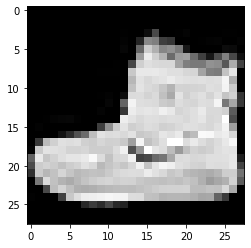

In [51]:
plt.imshow(train_images[0],cmap= "gray") #first image from training set and looks like a ankle boot

In [52]:
train_images[0]  #these are the data for the formation first image of training set

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#### printing the labels of the first image in the training data

In [53]:
print(train_labels[0])  # we have mapped above that which number belong to which fashion product

9


#### Data Processing

In [54]:
train_images = train_images.reshape((60000,28*28)) #flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = test_images.reshape((10000, 28*28))


Since, the data point for first image of ankle boot is in the pixel value of between 0 to 255,
so we need to normalize the pixel value between 0 to 1, for this we follow the follwoing process

In [55]:
train_images = train_images.astype("float32")/255 # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32")/255

In [56]:
print(train_images.min()) # we can see that pixel value between 0 to 255 has been normalized to 0 to 1
print(test_images.max())

0.0
1.0


In [57]:
print(train_images.shape)  #now here we can see the 2*28 image is flatten to 1dimension
print(test_images[0].shape)

(60000, 784)
(784,)


#### Even we normalize the pixel value between 0 to 1 but we found the image is still the same

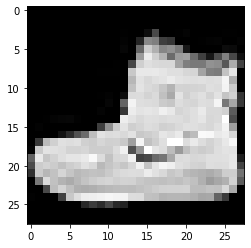

In [58]:
plt.imshow(train_images[0].reshape(28,28),cmap ="gray")

#### Train a dense neural network using Keras

In [59]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),  # 512 neuron in first layer with relu activation function
    layers.Dense(10, activation="softmax")  #10 neuron in second layer with softmax activation function
])

#### Defining the loss Function, Optimizer, and Metrics

In [60]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#### Training the model or fitting the model

In [61]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
#loss is the model performance during training and we need to minimize the loss
#accuracy is the curreclty predicted labels during training for epoch 5

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5598 - accuracy: 0.8029
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3861 - accuracy: 0.8594
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3393 - accuracy: 0.8742
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3118 - accuracy: 0.8849
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2937 - accuracy: 0.8906


#### Using Model to make predictions

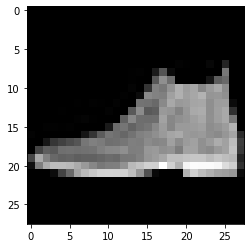

In [62]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')  # the actual image

In order to make prediction, model need  2-Dimension array of shape

In [63]:
print(test_images[0].shape)  # this will result in an error if given as input to the model (since it is a 1d array)
print(test_images[0:1].shape)

(784,)
(1, 784)


In [64]:
prediction = model.predict(test_images[0:1]) # we did test_images[0:1] jsut to make 2D array os shape

1/1 [==============================] - 0s 52ms/step


In [65]:
prediction  # 10 classes, each with a probability

array([[4.48064065e-06, 4.96329108e-07, 6.23895460e-07, 7.33549939e-07,
        4.31294296e-07, 2.45953258e-03, 4.38507777e-06, 2.11239699e-02,
        1.19852324e-04, 9.76285458e-01]], dtype=float32)

In [66]:
prediction.argmax() #the class with the highest probability

9

In [67]:
prediction[0, 9]  # the probability of the 9th class (of the zeroth data instance)

0.97628546

In [68]:
test_labels[0]  #the actual label

9

Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration

#### Now evaluating the model accuracy with test data and train data

In [69]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3591 - accuracy: 0.8706
test_acc: 0.8705999851226807


Now evaluating the model with train data

In [70]:
test_loss, train_acc = model.evaluate(train_images, train_labels)
print(f"train_acc: {train_acc}")

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2832 - accuracy: 0.8943
train_acc: 0.894266664981842


#### Confusion Matrix

In [71]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [72]:
predicted_labels = np.argmax(predictions, axis=1)

In [73]:
confusion_mat = confusion_matrix(test_labels, predicted_labels)

In [74]:
confusion_mat

array([[877,   0,   9,   7,   5,   0,  86,   0,  16,   0],
       [  8, 962,   1,  21,   4,   0,   3,   0,   1,   0],
       [ 21,   0, 689,   5, 178,   0, 100,   0,   7,   0],
       [ 63,   4,  10, 818,  26,   0,  71,   0,   8,   0],
       [  0,   0,  46,  16, 813,   0, 115,   0,  10,   0],
       [  0,   0,   0,   1,   0, 959,   0,  23,   2,  15],
       [151,   0,  60,  13,  72,   0, 686,   0,  18,   0],
       [  0,   0,   0,   0,   0,  12,   0, 968,   2,  18],
       [  1,   0,   2,   3,   1,   2,   4,   3, 984,   0],
       [  0,   0,   0,   0,   0,   4,   1,  45,   0, 950]], dtype=int64)

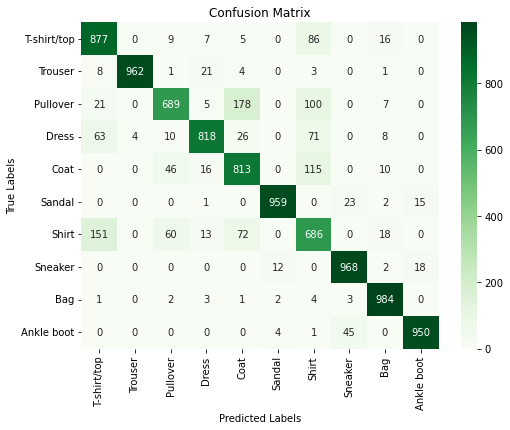

In [75]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

From Confusion Matrix, we can get a several understanding from the model's performance on different classes.
In confusion Matrix, the number of matrix element which made diagonal elements were considered as classified correclty whereas
matrix elements outside diagonal or off-diagonal elements were classified as misclassification.

Classes with high Diagonal values like T-shirt,Trouser,Sandal,Bag depicts that model done well for these classes with differentiating correclty

Classes with off diagonal values like T-shirt and Shirt is misclassified, coat, shirt were also misclassified as pullover and 
sneaker were also misclassified sometimes as ankle boot or sandal.



